In [1]:
from utils import *

In [2]:
jtplot_style()

In [3]:
batch_size = 64
architecture = resnet34
image_size = 128

In [6]:
def get_data(sz, bs, _tfms=None):
    if _tfms is None: _tfms = tfms_from_model(architecture, sz)
    return ImageClassifierData.from_paths(DIR_DATA, bs, _tfms)

In [7]:
_tfms = tfms_from_model(architecture, image_size,
                        aug_tfms=transforms_side_on, max_zoom=1.1)
data = get_data(image_size, batch_size, _tfms)

In [8]:
model = ConvLearner.pretrained(architecture, data, precompute=True)

 83%|████████▎ | 50/60 [00:01<00:07,  1.37it/s, loss=2.81]


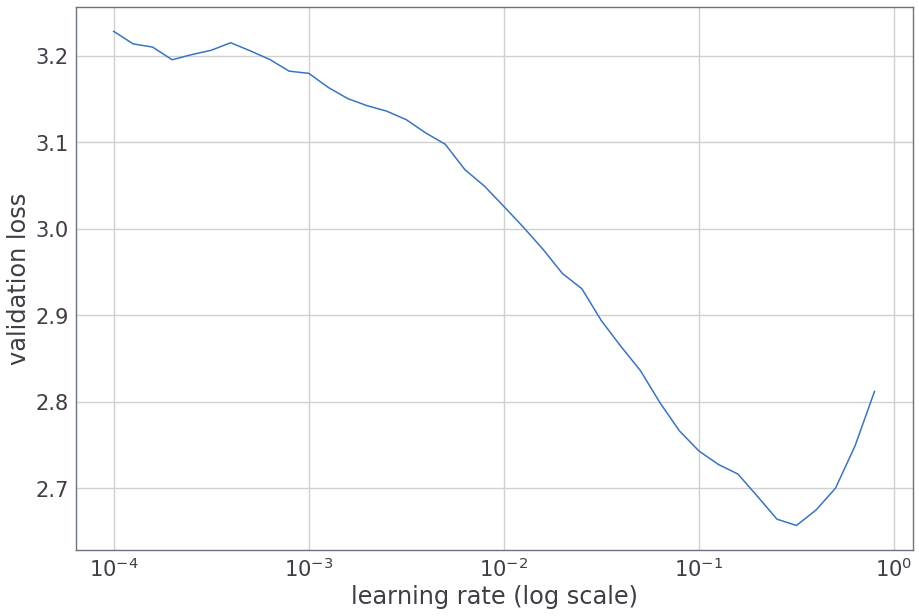

In [9]:
model.lr_find()
model.sched.plot()

In [10]:
model.fit(1e-1, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                 
    0      1.952611   1.141837   0.605069  
    1      1.627561   1.002849   0.646251                 



[array([1.00285]), 0.6462513205242257]

In [11]:
model.precompute = False

In [12]:
model.fit(1e-1, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      1.356583   0.926448   0.661035  
    1      1.252028   0.915978   0.684266                  
    2      1.124258   0.825316   0.713833                  



[array([0.82532]), 0.7138331577795486]

In [13]:
model.unfreeze()

 95%|█████████▌| 57/60 [00:51<00:01,  1.51it/s, loss=4.65]

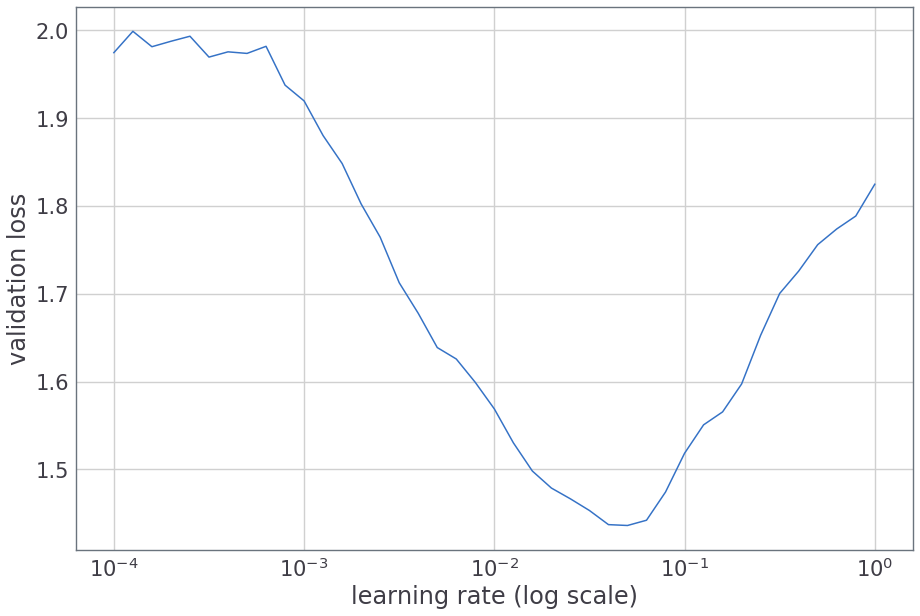

In [14]:
model.lr_find()
model.sched.plot()

In [ ]:
model.fit([1e-4, 1e-3, 1e-2], 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      1.069762   0.695028   0.761352  
    1      0.719278   0.418994   0.86378                   
    2      0.521312   0.407355   0.860612                  
    3      0.428649   0.351731   0.883844                  
    4      0.346809   0.302869   0.891235                  
    5      0.296565   0.298402   0.894403                  
 40%|████      | 24/60 [00:22<00:24,  1.48it/s, loss=0.282]

In [ ]:
model.save(DIR_CHECKPOINTS / 'model')